In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/audiology.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '1000M')

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['history_noise','class'],['history_fluctuating','class']]
tempForbid = p.ForbiddenWithin(
    ['class','history_fluctuating','history_noise'])
temporal = [tempForbid]
prior = p.knowledge(forbiddirect = forbid, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

0* class history_fluctuating history_noise 

forbiddirect

history_fluctuating ==> class 
history_noise ==> class 
requiredirect


#### Load causal algorithms from the py-causal library and Run Bootstrapping GFCI Discrete

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'gfci', testId = 'disc-bic', scoreId = 'bdeu')

samplePrior: Sample prior (min = 1.0) (java.lang.Double) [default:1.0]
structurePrior: Structure prior coefficient (min = 1.0) (java.lang.Double) [default:1.0]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
maxPathLength: The maximum length for any discriminating path. -1 if unlimited (min = -1) (java.lang.Integer) [default:-1]
completeRuleSetUsed: Yes if the complete FCI rule set should be used (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]


In [6]:
tetrad.run(algoId = 'gfci', dfs = df, testId = 'disc-bic', scoreId = 'bdeu', priorKnowledge = prior, dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
           bootstrapSampleSize = 4, bootstrapEnsemble = 0)

#### Bootstrapping GFCI Discrete's Result's Nodes

In [7]:
tetrad.getNodes()

['age_gt_60',
 'air',
 'airBoneGap',
 'ar_c',
 'ar_u',
 'bone',
 'boneAbnormal',
 'bser',
 'class',
 'history_buzzing',
 'history_dizziness',
 'history_fluctuating',
 'history_fullness',
 'history_heredity',
 'history_nausea',
 'history_noise',
 'history_recruitment',
 'history_ringing',
 'history_roaring',
 'history_vomiting',
 'indentifier',
 'late_wave_poor',
 'm_at_2k',
 'm_cond_lt_1k',
 'm_gt_1k',
 'm_m_gt_2k',
 'm_m_sn',
 'm_m_sn_gt_1k',
 'm_m_sn_gt_2k',
 'm_m_sn_gt_500',
 'm_p_sn_gt_2k',
 'm_s_gt_500',
 'm_s_sn',
 'm_s_sn_gt_1k',
 'm_s_sn_gt_2k',
 'm_s_sn_gt_3k',
 'm_s_sn_gt_4k',
 'm_sn_2_3k',
 'm_sn_gt_1k',
 'm_sn_gt_2k',
 'm_sn_gt_3k',
 'm_sn_gt_4k',
 'm_sn_gt_500',
 'm_sn_gt_6k',
 'm_sn_lt_1k',
 'm_sn_lt_2k',
 'm_sn_lt_3k',
 'middle_wave_poor',
 'mod_gt_4k',
 'mod_mixed',
 'mod_s_mixed',
 'mod_s_sn_gt_500',
 'mod_sn',
 'mod_sn_gt_1k',
 'mod_sn_gt_2k',
 'mod_sn_gt_3k',
 'mod_sn_gt_4k',
 'mod_sn_gt_500',
 'notch_4k',
 'notch_at_4k',
 'o_ar_c',
 'o_ar_u',
 's_sn_gt_1k',
 's_sn_g

#### Bootstrapping GFCI Discrete's Result's Edges

In [8]:
tetrad.getEdges()

['ar_u --> history_ringing [ar_u --> history_ringing nl dd]:0.2500;[no edge]:0.7500; nl dd',
 'history_fluctuating --> history_recruitment [history_fluctuating --> history_recruitment nl dd]:0.2500;[history_fluctuating <-- history_recruitment nl dd]:0.2500;[history_fluctuating <-o history_recruitment]:0.2500;[no edge]:0.2500; nl dd',
 'm_sn_gt_2k o-> bser [bser <-o m_sn_gt_2k]:0.2500;[bser o-o m_sn_gt_2k]:0.2500;[no edge]:0.5000;',
 'speech --> age_gt_60 [age_gt_60 <-- speech nl dd]:0.2500;[age_gt_60 o-o speech]:0.2500;[no edge]:0.5000; nl dd',
 'history_nausea --> waveform_ItoV_prolonged [history_nausea --> waveform_ItoV_prolonged nl dd]:0.2500;[no edge]:0.7500; nl dd',
 'history_ringing --> m_gt_1k [history_ringing --> m_gt_1k nl dd]:0.2500;[no edge]:0.7500; nl dd',
 'o_ar_u o-> ar_u [ar_u <-o o_ar_u]:0.5000;[ar_u <-- o_ar_u nl dd]:0.2500;[no edge]:0.2500;',
 'static_normal --> o_ar_c [o_ar_c <-- static_normal nl dd]:0.2500;[no edge]:0.7500; nl dd',
 'class --> indentifier [class o->

#### Plot The Result's Graph

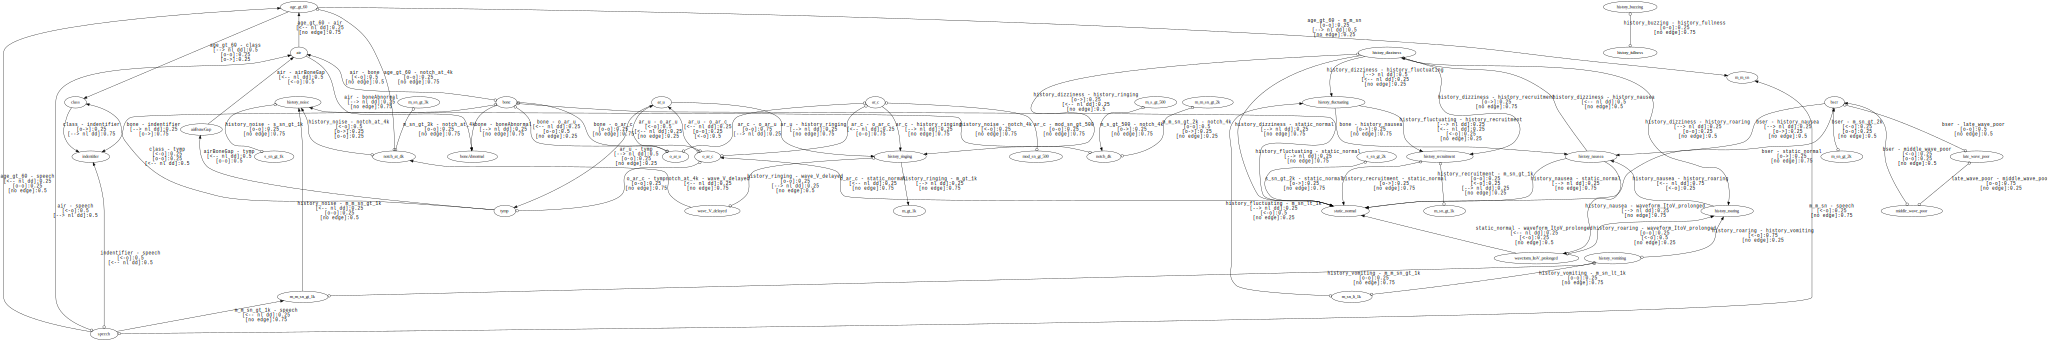

In [9]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [10]:
pc.stop_vm()